## EDA

In [4]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import seaborn as sns
from glob import glob

In [5]:
PATH_ROOT = f'../sample/'

S1 = f'{PATH_ROOT}ROIs1158_spring_s1/'
S2 = f'{PATH_ROOT}ROIs1158_spring_s2/'
S2_CLOUDY = f'{PATH_ROOT}ROIs1158_spring_s2_cloudy/'

PATH_OUTPUT = f'output/'
os.makedirs(PATH_OUTPUT, exist_ok=True)

In [6]:
PATHS_TIF_S1 = sorted(glob(os.path.join(S1, '*', '*.tif')))
PATHS_TIF_S2 = sorted(glob(os.path.join(S2, '*', '*.tif')))
PATHS_TIF_S2_CLOUDY = sorted(glob(os.path.join(S2_CLOUDY, '*', '*.tif')))

assert len(PATHS_TIF_S1) == len(PATHS_TIF_S2) == len(PATHS_TIF_S2_CLOUDY)

df = pd.DataFrame({
    's1': PATHS_TIF_S1,
    's2': PATHS_TIF_S2,
    's2_cloudy': PATHS_TIF_S2_CLOUDY,
})
df.head()

s1  \
0  ../sample/ROIs1158_spring_s1/s1_1/ROIs1158_spr...   
1  ../sample/ROIs1158_spring_s1/s1_1/ROIs1158_spr...   
2  ../sample/ROIs1158_spring_s1/s1_1/ROIs1158_spr...   
3  ../sample/ROIs1158_spring_s1/s1_1/ROIs1158_spr...   
4  ../sample/ROIs1158_spring_s1/s1_1/ROIs1158_spr...   

                                                  s2  \
0  ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spr...   
1  ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spr...   
2  ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spr...   
3  ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spr...   
4  ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spr...   

                                           s2_cloudy  
0  ../sample/ROIs1158_spring_s2_cloudy/s2_cloudy_...  
1  ../sample/ROIs1158_spring_s2_cloudy/s2_cloudy_...  
2  ../sample/ROIs1158_spring_s2_cloudy/s2_cloudy_...  
3  ../sample/ROIs1158_spring_s2_cloudy/s2_cloudy_...  
4  ../sample/ROIs1158_spring_s2_cloudy/s2_cloudy_...

In [7]:
len(PATHS_TIF_S1), len(PATHS_TIF_S2), len(PATHS_TIF_S2_CLOUDY)

(29117, 29117, 29117)

(256, 256, 2)


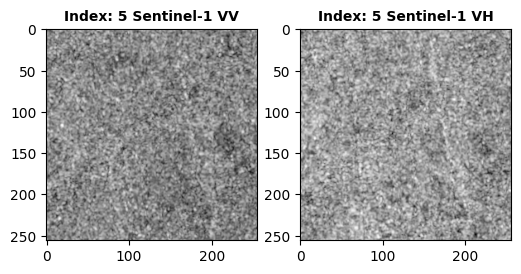

(256, 256, 13)


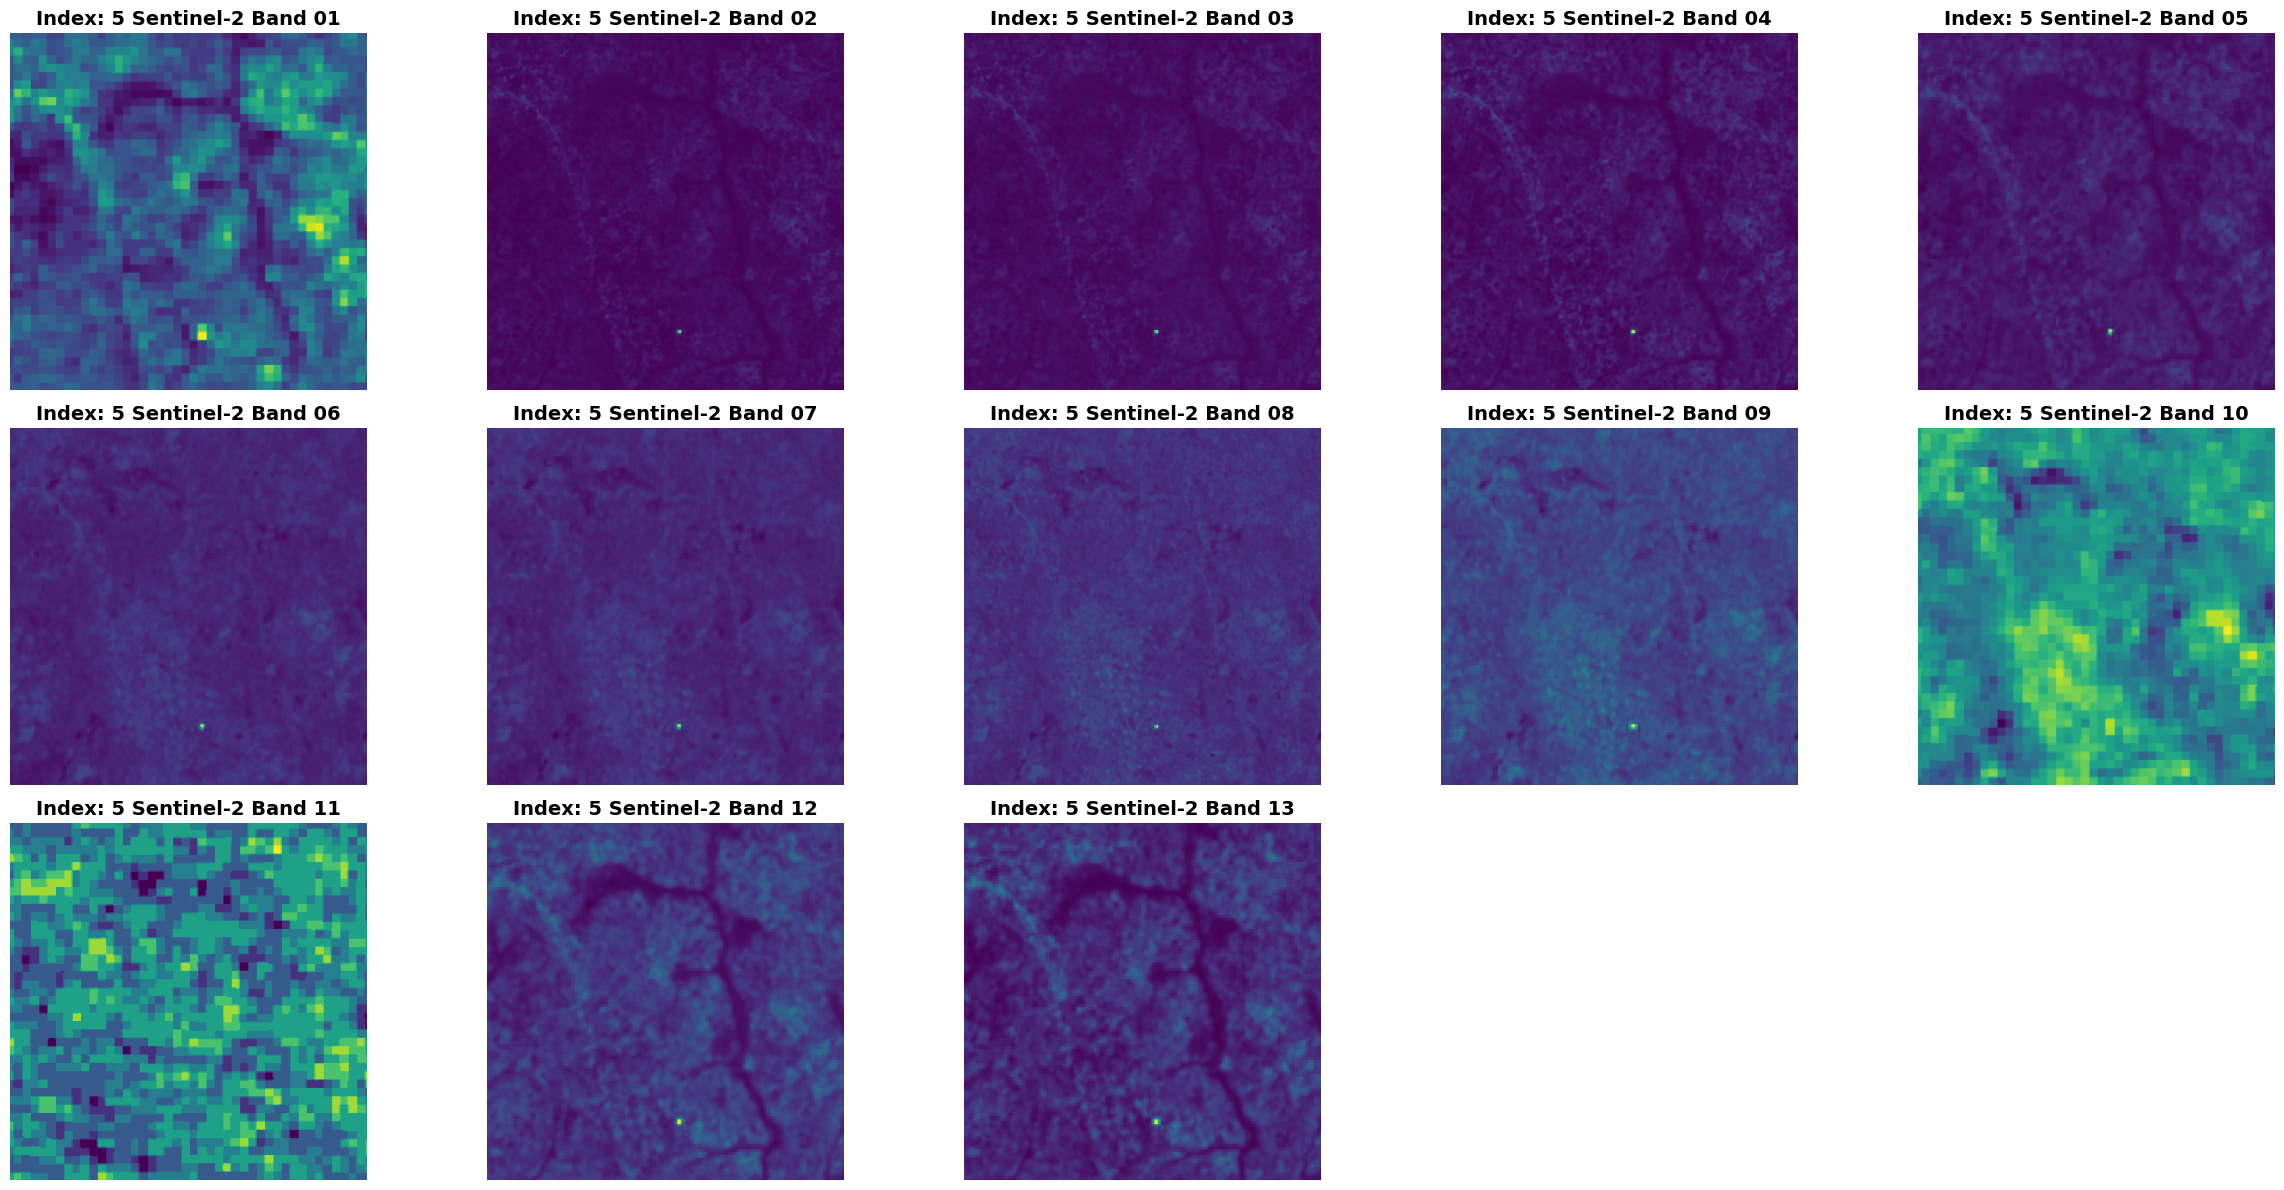

In [8]:
IDX = 5

img_s1 = tifffile.imread(df['s1'].iloc[IDX])
print(img_s1.shape)

plt.figure(figsize=(6, 14))
for i, pol in enumerate(['VV', 'VH']):
    plt.subplot(1, 2, i+1)
    plt.title(f'Index: {IDX} Sentinel-1 {pol}', fontsize=10, fontweight='bold')
    plt.imshow(img_s1[:,:,i], cmap='gray')
plt.savefig(f'{PATH_OUTPUT}s1_{IDX}.png', bbox_inches='tight', dpi=150)
plt.show();
    
img_s2 = tifffile.imread(df['s2'].iloc[IDX])
print(img_s2.shape)

plt.figure(figsize=(24, 12), dpi=100)
for i, band in enumerate([f'Band {str(b).zfill(2)}' for b in range(1, 14)]):

    plt.subplot(3, 5, i+1)

    plt.title(f'Index: {IDX} Sentinel-2 {band}', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.imshow(img_s2[:,:,i])
plt.tight_layout()
plt.savefig(f'{PATH_OUTPUT}s2_{IDX}.png', bbox_inches='tight', dpi=150)
plt.show();

plt.clf()
plt.close()

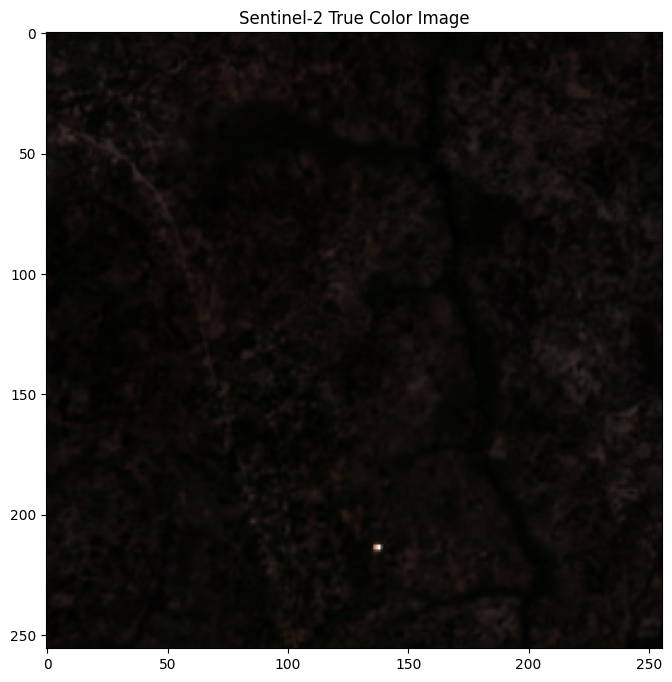

In [9]:
def norm_img(img):
    img = img.astype('float32')
    img = (img - img.min()) / (img.max() - img.min())
    return img

img_true = []

img_true.append(norm_img(img_s2[:,:,3]))
img_true.append(norm_img(img_s2[:,:,2]))
img_true.append(norm_img(img_s2[:,:,1]))

img_true = np.stack(img_true, axis=2)

plt.figure(figsize=(8, 8))
plt.title('Sentinel-2 True Color Image')
plt.imshow(img_true)
plt.savefig(f'{PATH_OUTPUT}true_color.png')
plt.show();

In [10]:
df.s1.iloc[0]

'../sample/ROIs1158_spring_s1/s1_1/ROIs1158_spring_s1_1_p100.tif'

In [11]:
# meta info
df['area'] = df.s1.str.split('/').str[-2]
df['file'] = df.s1.str.split('/').str[-1]
df['name'] = df.file.str.split('.').str[0]
df['patch'] = df.name.str.split('_p').str[1]
df['patch'] =  df['patch'].astype(int)
 
df.head()

s1  \
0  ../sample/ROIs1158_spring_s1/s1_1/ROIs1158_spr...   
1  ../sample/ROIs1158_spring_s1/s1_1/ROIs1158_spr...   
2  ../sample/ROIs1158_spring_s1/s1_1/ROIs1158_spr...   
3  ../sample/ROIs1158_spring_s1/s1_1/ROIs1158_spr...   
4  ../sample/ROIs1158_spring_s1/s1_1/ROIs1158_spr...   

                                                  s2  \
0  ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spr...   
1  ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spr...   
2  ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spr...   
3  ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spr...   
4  ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spr...   

                                           s2_cloudy  area  \
0  ../sample/ROIs1158_spring_s2_cloudy/s2_cloudy_...  s1_1   
1  ../sample/ROIs1158_spring_s2_cloudy/s2_cloudy_...  s1_1   
2  ../sample/ROIs1158_spring_s2_cloudy/s2_cloudy_...  s1_1   
3  ../sample/ROIs1158_spring_s2_cloudy/s2_cloudy_...  s1_1   
4  ../sample/ROIs1158_spring_s2_cloudy/s2_cloudy_...  s1_1   

                            file                       name  patch  
0  ROIs1158_spring_s1_1_p100.tif  ROIs1158_spring_s1_1_p100    100  
1  ROIs1158_spring_s1_1_p101.tif  ROIs1158_spring_s1_1_p101    101  
2  ROIs1158_spring_s1_1_p102.tif  ROIs1158_spring_s1_1_p102    102  
3  ROIs1158_spring_s1_1_p103.tif  ROIs1158_spring_s1_1_p103    103  
4  ROIs1158_spring_s1_1_p104.tif  ROIs1158_spring_s1_1_p104    104

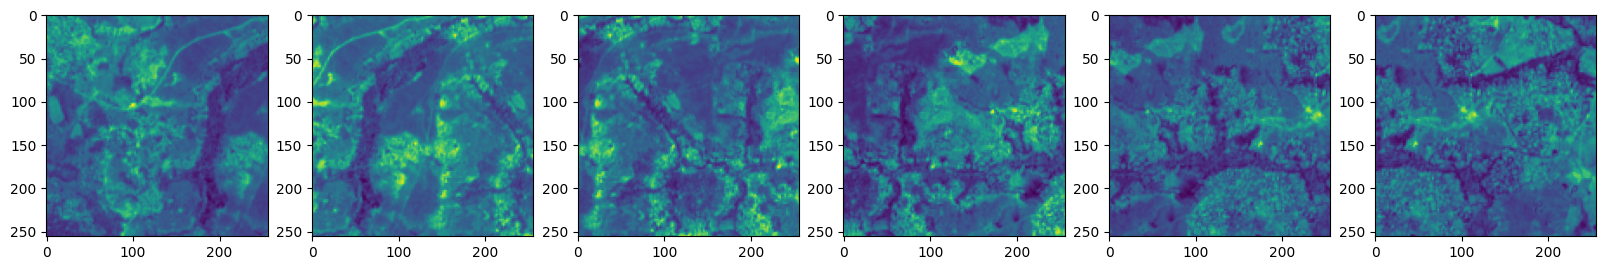

In [12]:
AREA = 6

NUM_SAMPLE = 6

df_area = df[df['area'] == f's1_{AREA}'][:6]

plt.figure(figsize=(20, 10))
for i in range(NUM_SAMPLE):
    PATH = df_area.iloc[i]['s2']
    img = tifffile.imread(PATH)[:,:,4]
    plt.subplot(1, 6, i+1)
    plt.imshow(img)

plt.savefig(f'{PATH_OUTPUT}/same_area_{AREA}.png')
plt.show();

plt.clf()
plt.close()

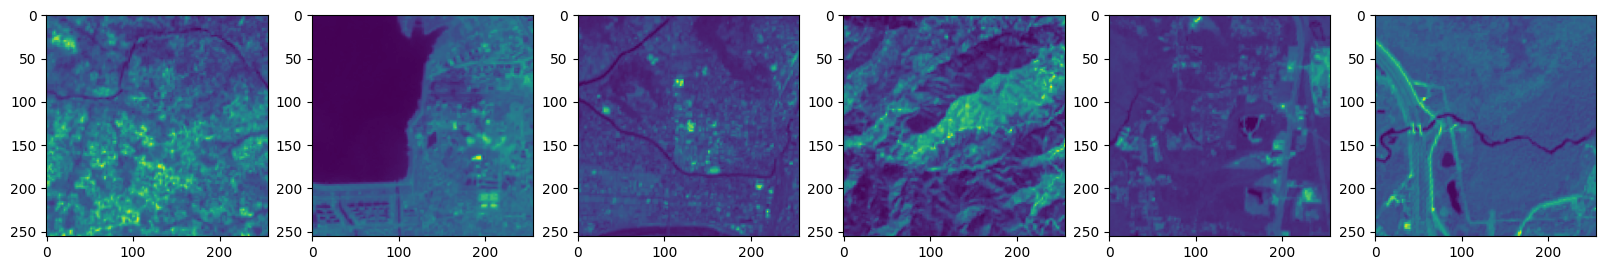

In [13]:
PATCH = 102

NUM_SAMPLE = 6

df_area = df[df['patch'] == PATCH][:6]

plt.figure(figsize=(20, 10))
for i in range(NUM_SAMPLE):
    PATH = df_area.iloc[i]['s2']
    img = tifffile.imread(PATH)[:,:,4]
    plt.subplot(1, 6, i+1)
    plt.imshow(img)

plt.savefig(f'{PATH_OUTPUT}/same_area_{AREA}.png')
plt.show();

plt.clf()
plt.close()

(256, 256, 13)


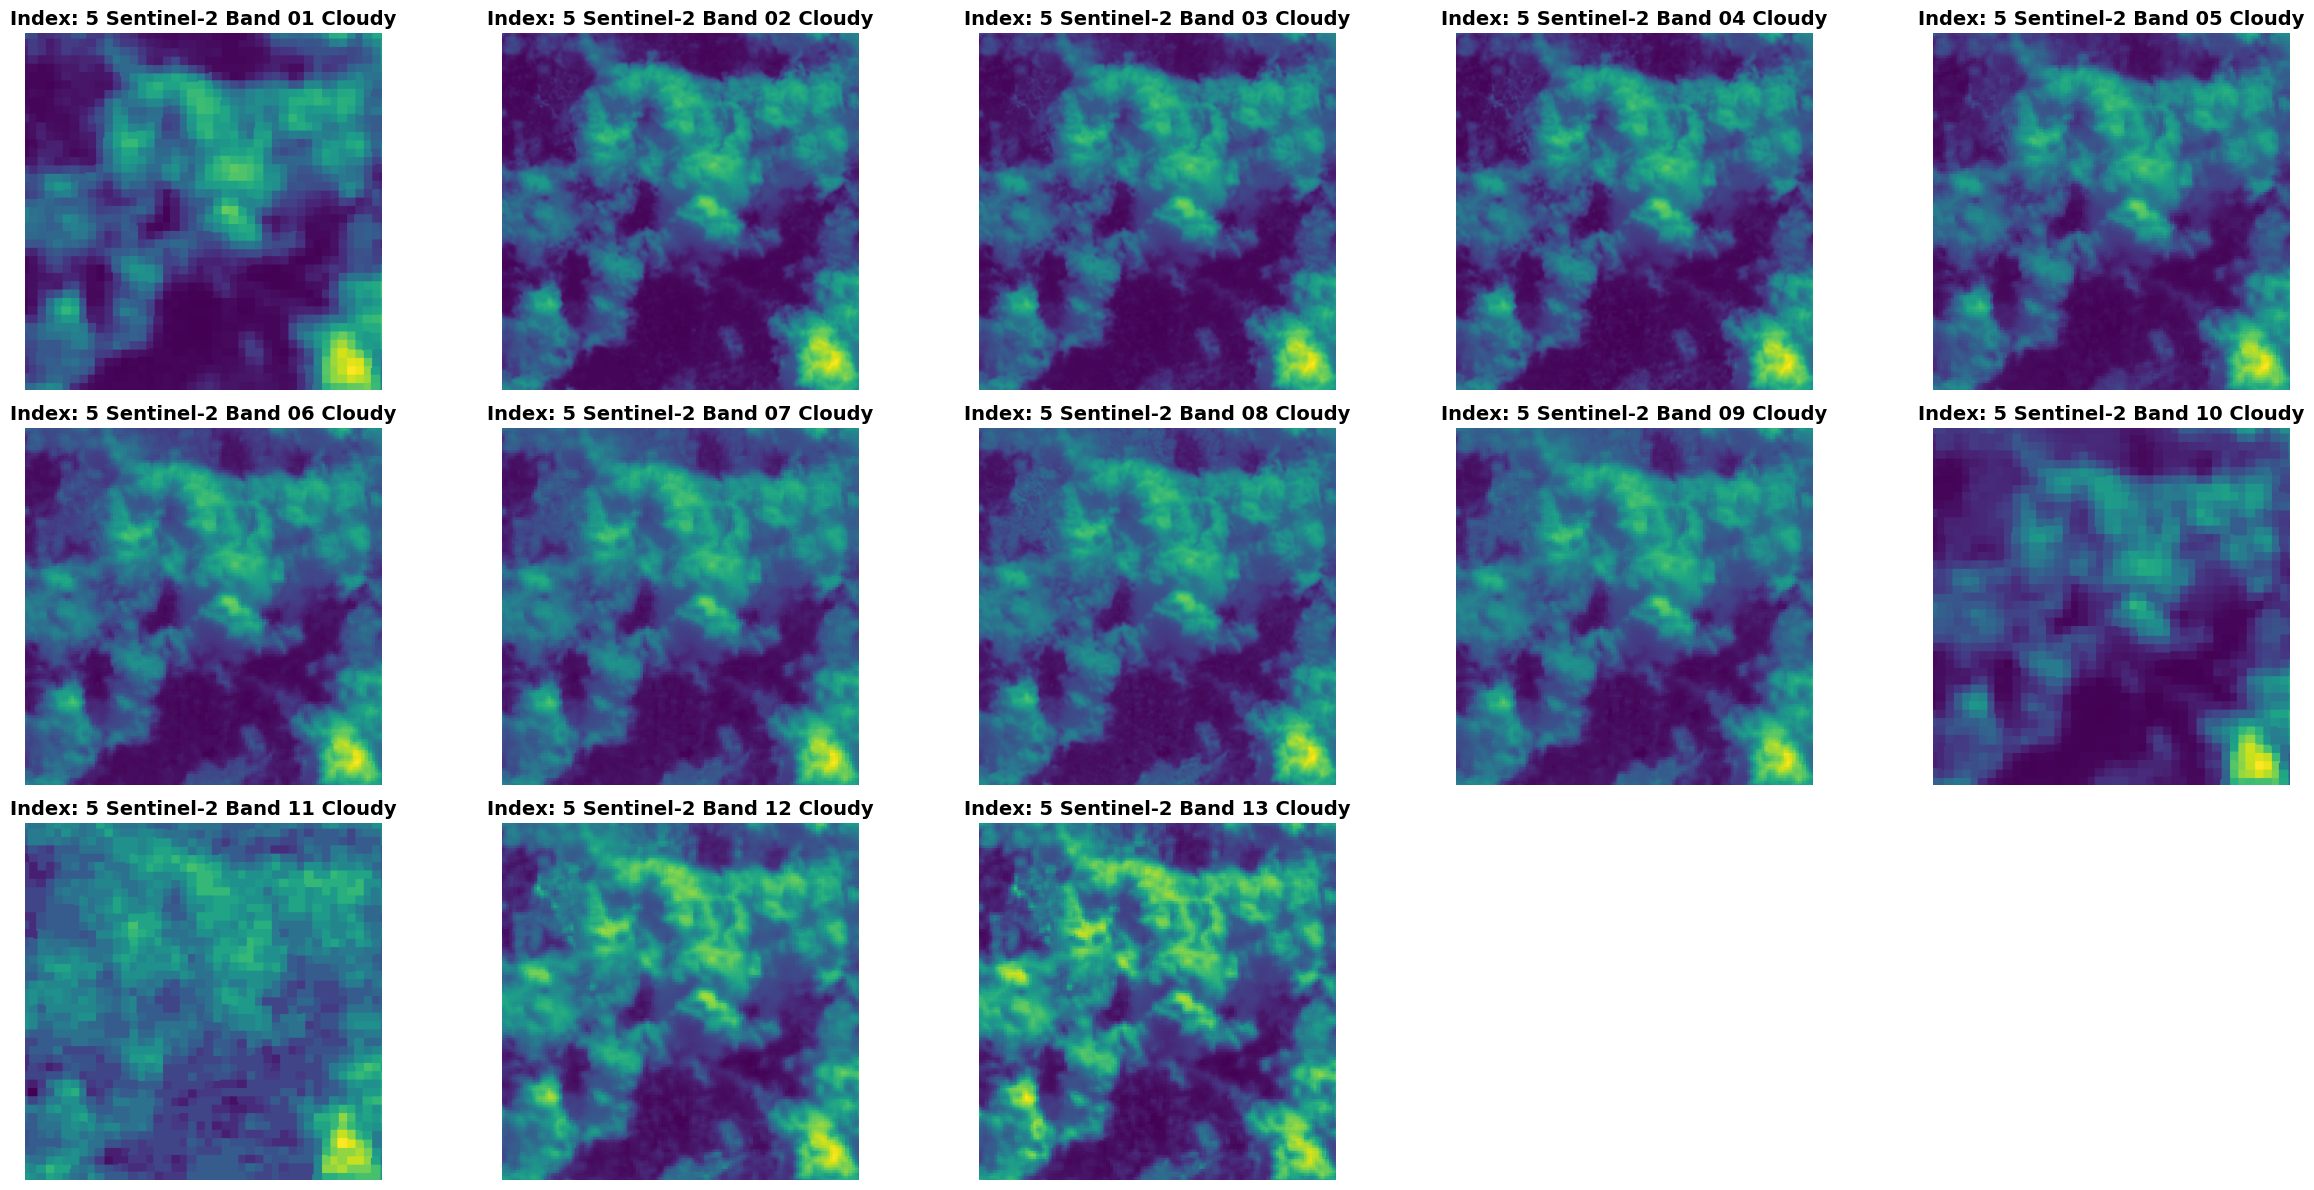

In [14]:
img_c = tifffile.imread(df['s2_cloudy'].iloc[IDX])
print(img_c.shape)

plt.figure(figsize=(24, 12), dpi=100)
for i, band in enumerate([f'Band {str(b).zfill(2)}' for b in range(1, 14)]):

    plt.subplot(3, 5, i+1)

    plt.title(f'Index: {IDX} Sentinel-2 {band} Cloudy', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.imshow(img_c[:,:,i])
plt.tight_layout()
plt.savefig(f'{PATH_OUTPUT}s2_cloudy_{IDX}.png', bbox_inches='tight', dpi=150)
plt.show();

plt.clf()
plt.close()